# Fraud Detection

Description:
1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction

# Data Preparation

In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Exploratory Data Analysis

In [5]:
def preprocessing(df):
    """"
    Objective :
    Function for preprocessing data, known missing, duplicated values and basic stastics every column in dataframe and duplicated row
    df is dataframe
    """
    try:
        import pandas as pd
        variables = pd.DataFrame(columns=['Variable','Number of unique values','Percent of Null(%)','Number of Duplicated','Type','Values'])
        for i, var in enumerate(df.columns):
            variables.loc[i] = [var, df[var].nunique(),df[var].isnull().sum()/df.shape[0]*100,df[var].duplicated(keep=False).sum(),df[var].dtypes,df[var].unique()]
        return (variables.set_index('Variable'))
    except:
        print('ada kesalahan penginputan')

In [6]:
preprocessing(df)

,Number of unique values,Percent of Null(%),Number of Duplicated,Type,Values
Variable,,,,,
step,743,0.0,6362620,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
type,5,0.0,6362620,object,"[PAYMENT, TRANSFER, CASH_OUT, DEBIT, CASH_IN]"
amount,5316900,0.0,1824196,float64,"[9839.64, 1864.28, 181.0, 11668.14, 7817.71, 7..."
nameOrig,6353307,0.0,18611,object,"[C1231006815, C1666544295, C1305486145, C84008..."
oldbalanceOrg,1845844,0.0,4722056,float64,"[170136.0, 21249.0, 181.0, 41554.0, 53860.0, 1..."
newbalanceOrig,2682586,0.0,3747531,float64,"[160296.36, 19384.72, 0.0, 29885.86, 46042.29,..."
nameDest,2722362,0.0,4099916,object,"[M1979787155, M2044282225, C553264065, C389970..."
oldbalanceDest,3614697,0.0,2783980,float64,"[0.0, 21182.0, 41898.0, 10845.0, 5083.0, 22425..."
newbalanceDest,3555499,0.0,3090884,float64,"[0.0, 40348.79, 157982.12, 51513.44, 16896.7, ..."


**Data Insight**

    1. Tidak ada nilai null value pada dataset
    2. satu user bisa transaksi berkali-kali (nameOrigin yang duplicate)

In [7]:
round(df.describe())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0
mean,243.0,179862.0,833883.0,855114.0,1100702.0,1224996.0,0.0,0.0
std,142.0,603858.0,2888243.0,2924049.0,3399180.0,3674129.0,0.0,0.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,156.0,13390.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,239.0,74872.0,14208.0,0.0,132706.0,214661.0,0.0,0.0
75%,335.0,208721.0,107315.0,144258.0,943037.0,1111909.0,0.0,0.0
max,743.0,92445517.0,59585040.0,49585040.0,356015889.0,356179279.0,1.0,1.0


In [8]:
df.duplicated().sum()

0

## Univariate Analysis

### Waktu Transaksi

In [9]:
num_days = 7
num_hours = 24
df['days'] = df['step']%num_days
df['hours'] = df['step']%num_hours

In [10]:
df['day_trans'] = df['step']/24

In [11]:
df['day_trans'] = round(df['day_trans'])

In [12]:
time = ['step','days','hours','day_trans']

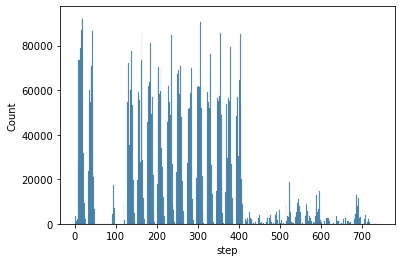

<Figure size 216x216 with 0 Axes>

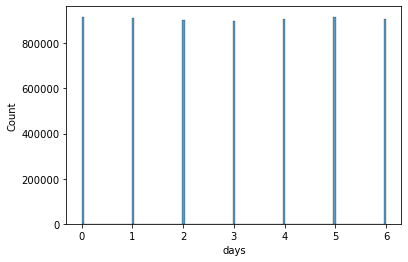

<Figure size 216x216 with 0 Axes>

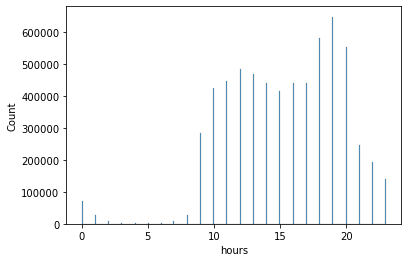

<Figure size 216x216 with 0 Axes>

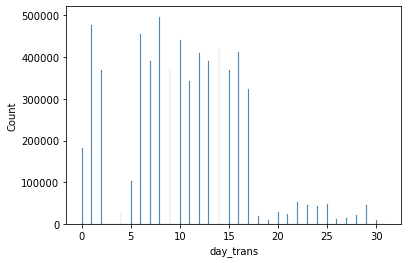

<Figure size 216x216 with 0 Axes>

In [13]:
for j in range (0,len(time)):
    num = time[j]
    sns.histplot(df[num])
    plt.figure(figsize=(3,3))
    plt.show()

**Data Insight**

    1. Jumlah transaksi setiap harinya memiliki frekuensi yang sama
    2. Transaksi dominan terjadi pada diatas jam 10 pagi
    3. Transaksi lebih banyak terjadi pada hari pertama hingga hari kedelapan belas

### Nominal Transaksi

In [14]:
round(df['amount'].describe())

count     6362620.0
mean       179862.0
std        603858.0
min             0.0
25%         13390.0
50%         74872.0
75%        208721.0
max      92445517.0
Name: amount, dtype: float64

**Data Transaksi**

    1. Jumlah transaksi yang terjadi yaitu 6.362.620 selama 32 hari
    2. Rata-rata transaksi adalah Rp. 179.862
    3. Maksimum transaksi adalah Rp 92.445.517

<AxesSubplot:xlabel='amount', ylabel='Density'>

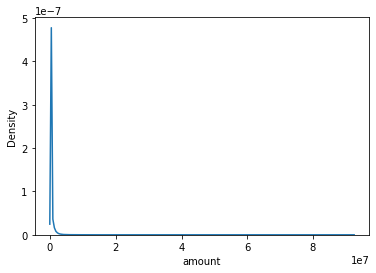

In [15]:
sns.kdeplot(df['amount'])

**Data Insight**

    1. Distribusi data amount terlalu skew negatif karena ada transaksi yang sangat besar jumlah tapi berjumlah sedikit
    2. Untuk analisis lebih lanjut bisa melakukan binning menjadi 3 bagian : Low, Medium, High, Very High

In [16]:
bins = [0,np.percentile(df['amount'],25),np.percentile(df['amount'],50),np.percentile(df['amount'],75),np.percentile(df['amount'],100)]

In [17]:
kategori = ['Low','Mid','High','Very High']

In [18]:
df['amount_bins'] = pd.cut(df['amount'], bins, labels=kategori, include_lowest=True)

In [19]:
amount_cat = df.groupby('amount_bins').agg({'amount':('min','max')}).reset_index()
amount_cat.columns = ['kategori','minimum amount','maximum amount']
amount_cat

,kategori,minimum amount,maximum amount
0,Low,0.00,13389.57
1,Mid,13389.60,74871.80
2,High,74872.08,208721.45
3,Very High,208721.56,92445516.64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount_bins', ylabel='count'>

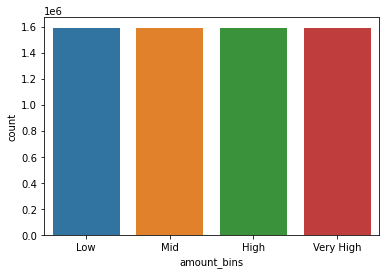

In [20]:
sns.countplot(df['amount_bins'])

In [21]:
amount_sum = df.groupby('amount_bins')['amount'].sum().reset_index()
amount_sum.columns = ['kategori','jumlah transaksi']

<AxesSubplot:xlabel='kategori', ylabel='jumlah transaksi'>

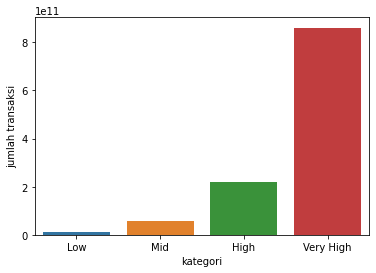

In [22]:
sns.barplot(x='kategori',y='jumlah transaksi',data=amount_sum)

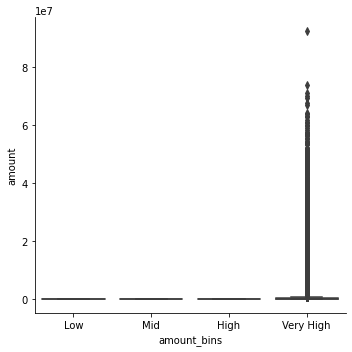

In [23]:
sns.catplot(x='amount_bins',y='amount',data=df,kind='box')

**Data Insight**

    1. Transaksi very high memiliki jumlah yang sangat besar

In [24]:
df_cat = df[~(df['amount_bins']=='Very High')]

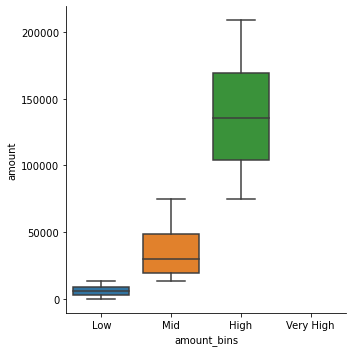

In [25]:
sns.catplot(x='amount_bins',y='amount',data=df_cat,kind='box')

<AxesSubplot:xlabel='amount', ylabel='Count'>

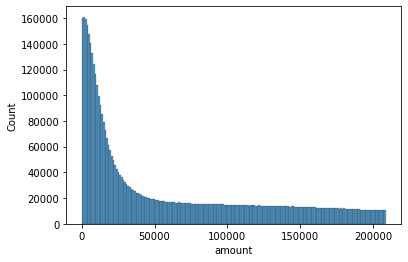

In [26]:
sns.histplot(df_cat['amount'])

**Data Insight**

    1. Transaksi lebih banyak terjadi dibawah 50.000

### Sender

In [27]:
sender = df['nameOrig'].value_counts().reset_index()

In [28]:
sender.sort_values('nameOrig',ascending=False).head(5)

,index,nameOrig
0,C1902386530,3
8,C2098525306,3
1,C363736674,3
14,C1530544995,3
13,C1065307291,3


**Data Insight**

    1. Satu customer paling banyak melakukan transaksi 3 kali dalam 32 hari

In [29]:
sender_amount = df.groupby('nameOrig')['amount'].sum().reset_index()

In [31]:
sender_amount.sort_values('amount',ascending=False)

,nameOrig,amount
2349681,C1715283297,92445516.64
3704557,C2127282686,73823490.36
3432985,C2044643633,71172480.42
1397877,C1425667947,69886731.30
1919229,C1584456031,69337316.27
...,...,...
965841,C1294472700,0.00
5349799,C69493310,0.00
4836929,C539112012,0.00
5803307,C832555372,0.00


In [32]:
sender_amount[sender_amount['amount']<=0].count()

nameOrig    16
amount      16
dtype: int64

**Data Insight**

    1. Ada 16 customer yang melakukan transaksi dibawah Rp 0

### Recepient

In [33]:
receiver = df['nameDest'].value_counts().reset_index()

In [34]:
receiver.sort_values('nameDest',ascending=False).head(10)

,index,nameDest
0,C1286084959,113
1,C985934102,109
2,C665576141,105
3,C2083562754,102
4,C248609774,101
5,C1590550415,101
6,C451111351,99
7,C1789550256,99
8,C1360767589,98
9,C1023714065,97


**Data Insight**

    1. ada 7 recepient yang melakukan transaksi lebih dari 100 kali

### Tipe Transaksi

In [35]:
type_count = df.groupby('type')['amount'].count().reset_index()

In [36]:
type_count.columns = ['type','banyaknya transaksi']

<AxesSubplot:xlabel='type', ylabel='banyaknya transaksi'>

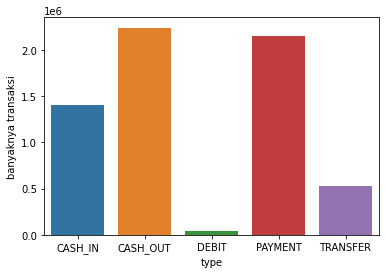

In [37]:
sns.barplot(x='type',y='banyaknya transaksi',data=type_count)

**Data Insight**

    1. Jenis transaksi debit dan transfer jarang terjadi

In [38]:
type_sum = df.groupby('type')['amount'].sum().reset_index()

In [39]:
type_sum.columns = ['type','jumlah transaksi']

<AxesSubplot:xlabel='type', ylabel='jumlah transaksi'>

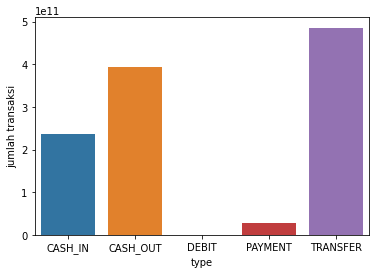

In [40]:
sns.barplot(x='type',y='jumlah transaksi',data=type_sum)

**Data Insight**

    1. Jumlah transaksi pada transfer mencapai lebih dari Rp 50.000.000.000

## Bivariate Analysis dengan Fraud

In [41]:
df_fraud = df[df['isFraud']==1]

In [42]:
df_fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,days,hours,day_trans
count,8213.000000,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8213.0,8213.000000,8213.000000,8213.000000,8213.000000
mean,368.413856,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,1.0,0.001948,3.032266,11.546451,15.352246
std,216.388690,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,0.0,0.044097,1.979081,6.874612,9.020664
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000
25%,181.000000,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000,1.000000,6.000000,8.000000
50%,367.000000,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,1.0,0.000000,3.000000,12.000000,15.000000
75%,558.000000,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,1.0,0.000000,5.000000,17.000000,23.000000
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0,1.000000,6.000000,23.000000,31.000000


AxesSubplot(0.260833,0.125;0.503333x0.755)


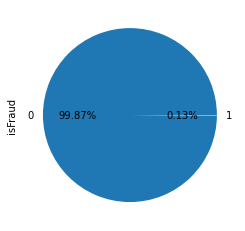

In [43]:
print((df['isFraud'].value_counts()).plot(kind='pie',autopct='%1.2f%%'))

**Data Insight**

    1. Transaksi fraud terjadi sebanyak 8.213
    2. Kemungkinan transaksi adalah 0,13%

In [44]:
df_fraud['amount'].sum()

12056415427.839998

In [45]:
df_fraud['amount'].sum()/df['amount'].sum()*100

1.0535206008606486

**Data Insight**

    1. Jumlah Transaksi fraud mencapai Rp 1.205.6415.427 dengan persentase 1% dari keseluruhan jumlah transaksi

### Waktu Transaksi

In [46]:
time = ['days','hours','day_trans']

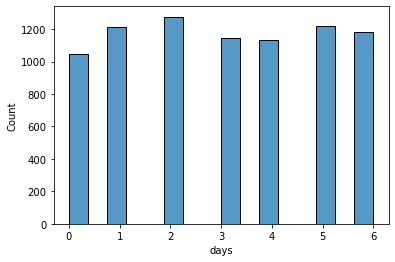

<Figure size 216x216 with 0 Axes>

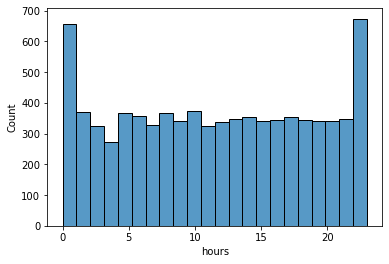

<Figure size 216x216 with 0 Axes>

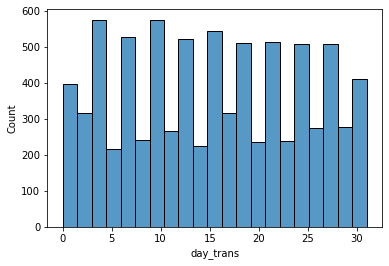

<Figure size 216x216 with 0 Axes>

In [47]:
for j in range (0,len(time)):
    num = time[j]
    sns.histplot(df_fraud[num])
    plt.figure(figsize=(3,3))
    plt.show()

**Data Insight**

    1. Transaksi pada jam 0:00 dan 23:00 sering terjadi fraud

In [48]:
df['IsFraud'] = df['isFraud']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


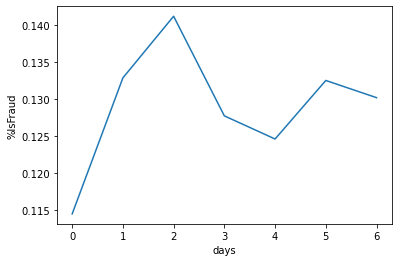

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


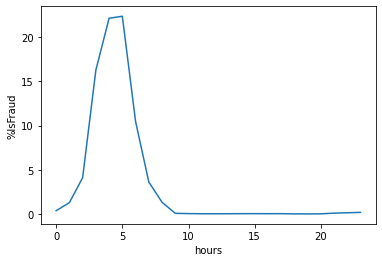

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


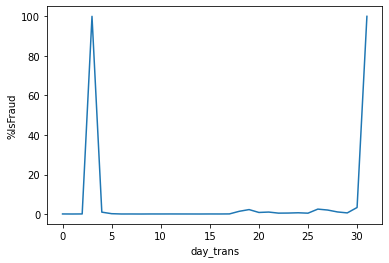

In [49]:
for j in range (0,len(time)):
    num = time[j]
    df['IsFraud_new'] = df['IsFraud']
    df_num = df.groupby([num])['IsFraud'].count()
    df_num = df_num.reset_index()
    df_num_corr = df[df['IsFraud']==1].groupby([num])['IsFraud_new'].count()
    df_num_corr = df_num_corr.reset_index()
    df_num_corr = df_num.merge(df_num_corr,how='left',on=num)
    df_num_corr['%IsFraud'] = (df_num_corr['IsFraud_new']/df_num_corr['IsFraud'])*100
    sns.lineplot(df_num_corr[num],df_num_corr['%IsFraud'])
    plt.xlabel(num)
    plt.ylabel('%IsFraud')
    plt.show()

**Data Insight**

    1. Transaksi pada jam 1-10 memiliki probabilitas fraud yang lebih tinggi
    2. Transaksi pada hari kedua sampe keempat memiliki probabilitas fraud yang sangat tinggi
    3. Transaksi pada hari ke 31 dan 32 memiliki probabilitas fraud yang tinggi

## Nominal Transaksi

In [50]:
num = 'amount_bins'

In [51]:
df['IsFraud_new'] = df['IsFraud']
df_num = df.groupby([num])['IsFraud'].count()
df_num = df_num.reset_index()
df_num_corr = df[df['IsFraud']==1].groupby([num])['IsFraud_new'].count()
df_num_corr = df_num_corr.reset_index()
df_num_corr = df_num.merge(df_num_corr,how='left',on=num)
df_num_corr['%IsFraud'] = (df_num_corr['IsFraud_new']/df_num_corr['IsFraud'])*100

In [52]:
df_num_corr = df_num_corr.dropna()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount_bins', ylabel='%IsFraud'>

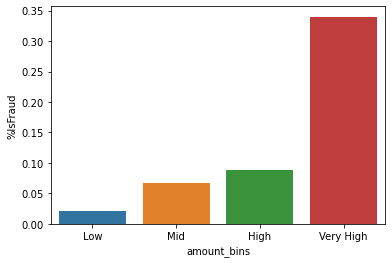

In [53]:
sns.barplot(df_num_corr['amount_bins'],df_num_corr['%IsFraud'])

**Data Insight**

    1. Transaksi Very High memiliki kemungkinan fraud yang tinggi 0,35%

In [54]:
df_very_high = df_fraud[df_fraud['amount_bins']=='Very High']

In [55]:
round(df_very_high['amount'].describe())

count        5404.0
mean      2187244.0
std       2696456.0
min        208868.0
25%        451598.0
50%       1003397.0
75%       2578131.0
max      10000000.0
Name: amount, dtype: float64

<AxesSubplot:xlabel='amount', ylabel='Count'>

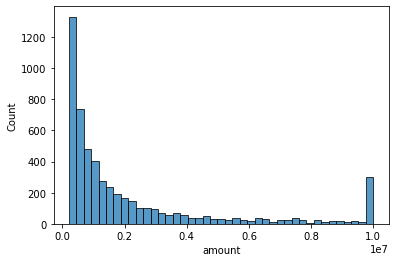

In [56]:
sns.histplot(df_very_high['amount'])

**Data Insight**

    1. Transaksi fraud dengan Rp 10.000.000 memiliki terjadi sebanyak 400 kali

### Sender

In [57]:
num = 'nameOrig'

In [58]:
df['IsFraud_new'] = df['IsFraud']
df_num = df.groupby([num])['IsFraud'].count()
df_num = df_num.reset_index()
df_num_corr = df[df['IsFraud']==1].groupby([num])['IsFraud_new'].count()
df_num_corr = df_num_corr.reset_index()
df_num_corr = df_num.merge(df_num_corr,how='left',on=num)
df_num_corr['%IsFraud'] = (df_num_corr['IsFraud_new']/df_num_corr['IsFraud'])*100

In [59]:
df_num_corr = df_num_corr.fillna(0)

In [60]:
df_num_corr.sort_values('%IsFraud',ascending=False)

,nameOrig,IsFraud,IsFraud_new,%IsFraud
3281729,C1998644906,1,1.0,100.0
3497858,C2064336595,1,1.0,100.0
3851566,C239155420,1,1.0,100.0
5637955,C782313486,1,1.0,100.0
3457566,C2052061131,1,1.0,100.0
...,...,...,...,...
2119179,C164527924,1,0.0,0.0
2119178,C16452791,1,0.0,0.0
2119177,C164527901,1,0.0,0.0
2119176,C164527882,1,0.0,0.0


**Data Transaksi**

Customer yang melakukan transaksi fraud adalah 100% dari kesuluruhan transaksi mereka

## Recepient

In [61]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,days,hours,day_trans,amount_bins,IsFraud,IsFraud_new
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,1,1,0.0,Low,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1,1,0.0,Low,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1,1,0.0,Low,1,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,1,0.0,Low,1,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,1,1,0.0,Low,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1,23,31.0,Very High,1,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,1,23,31.0,Very High,1,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1,23,31.0,Very High,1,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,1,23,31.0,Very High,1,1


In [62]:
num = 'nameDest'

In [63]:
df['IsFraud_new'] = df['IsFraud']
df_num = df.groupby([num])['IsFraud'].count()
df_num = df_num.reset_index()
df_num_corr = df[df['IsFraud']==1].groupby([num])['IsFraud_new'].count()
df_num_corr = df_num_corr.reset_index()
df_num_corr = df_num.merge(df_num_corr,how='left',on=num)
df_num_corr['%IsFraud'] = (df_num_corr['IsFraud_new']/df_num_corr['IsFraud'])*100
df_num_corr = df_num_corr.fillna(0)

In [71]:
df_num_corr.sort_values('IsFraud',ascending=False).head(10)

,nameDest,IsFraud,IsFraud_new,%IsFraud
84652,C1286084959,113,0.0,0.0
567820,C985934102,109,0.0,0.0
472721,C665576141,105,0.0,0.0
320660,C2083562754,102,0.0,0.0
349730,C248609774,101,0.0,0.0
174831,C1590550415,101,0.0,0.0
233498,C1789550256,99,0.0,0.0
409775,C451111351,99,0.0,0.0
106929,C1360767589,98,0.0,0.0
6969,C1023714065,97,0.0,0.0


In [72]:
df_num_corr.sort_values('%IsFraud',ascending=False).head(10)

,nameDest,IsFraud,IsFraud_new,%IsFraud
552804,C93455814,1,1.0,100.0
285206,C1963548176,1,1.0,100.0
397846,C411004597,1,1.0,100.0
448885,C584314061,1,1.0,100.0
326585,C2103213802,1,1.0,100.0
192640,C1650736473,1,1.0,100.0
241213,C1815024407,1,1.0,100.0
237465,C1802674568,1,1.0,100.0
496742,C746130258,1,1.0,100.0
384071,C364328277,1,1.0,100.0


## Tipe Transaksi

In [73]:
num = 'type'

In [74]:
df['IsFraud_new'] = df['IsFraud']
df_num = df.groupby([num])['IsFraud'].count()
df_num = df_num.reset_index()
df_num_corr = df[df['IsFraud']==1].groupby([num])['IsFraud_new'].count()
df_num_corr = df_num_corr.reset_index()
df_num_corr = df_num.merge(df_num_corr,how='left',on=num)
df_num_corr['%IsFraud'] = (df_num_corr['IsFraud_new']/df_num_corr['IsFraud'])*100
df_num_corr = df_num_corr.fillna(0)

In [75]:
df_num_corr.sort_values('%IsFraud',ascending=False).head(10)

,type,IsFraud,IsFraud_new,%IsFraud
4,TRANSFER,532909,4097.0,0.768799
1,CASH_OUT,2237500,4116.0,0.183955
0,CASH_IN,1399284,0.0,0.000000
2,DEBIT,41432,0.0,0.000000
3,PAYMENT,2151495,0.0,0.000000


<AxesSubplot:xlabel='type', ylabel='%IsFraud'>

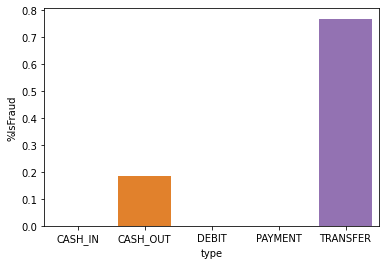

In [76]:
sns.barplot(x='type',y='%IsFraud',data=df_num_corr)

**Data Insight**

    1. Cash_Out dan Transfer merupakan tipe transaksi yang terjadi fraud

## Selisih antara amount dengan saldo

In [78]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,days,hours,day_trans,amount_bins,IsFraud,IsFraud_new
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,1,0.0,Low,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,1,0.0,Low,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,1,0.0,Low,1,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,1,0.0,Low,1,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,1,0.0,Low,0,0


In [85]:
df_fraud['selisih_sender'] = df_fraud['oldbalanceOrg']-df['newbalanceOrig']

C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_944\3679248269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud['selisih_sender'] = df_fraud['oldbalanceOrg']-df['newbalanceOrig']


In [86]:
df_fraud['selisih_recepient'] = df_fraud['oldbalanceDest']-df_fraud['newbalanceDest']

C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_944\1288885499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud['selisih_recepient'] = df_fraud['oldbalanceDest']-df_fraud['newbalanceDest']


In [90]:
df_fraud[['selisih_sender','amount','selisih_recepient','isFraud']]

,selisih_sender,amount,selisih_recepient,isFraud
2,181.00,181.00,0.00,1
3,181.00,181.00,21182.00,1
251,2806.00,2806.00,0.00,1
252,2806.00,2806.00,26202.00,1
680,20128.00,20128.00,0.00,1
...,...,...,...,...
6362615,339682.13,339682.13,-339682.13,1
6362616,6311409.28,6311409.28,0.00,1
6362617,6311409.28,6311409.28,-6311409.27,1
6362618,850002.52,850002.52,0.00,1


### Multikolinearitas

In [92]:
df_train = df[df.describe().columns.tolist()]

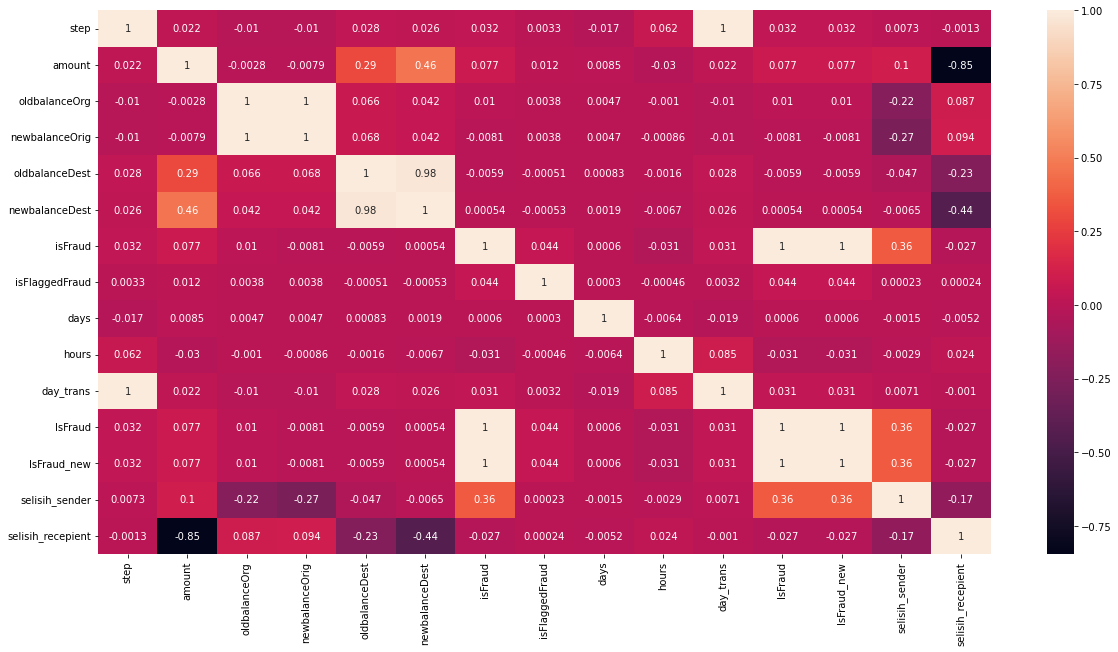

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = df_train.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_corr, annot=True)
plt.show()

In [95]:
corr_matrix = df_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_944\1340024243.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [96]:
to_drop_hicorr

['newbalanceOrig',
 'newbalanceDest',
 'day_trans',
 'IsFraud',
 'IsFraud_new',
 'selisih_recepient']

In [99]:
features = df.describe().columns.tolist()

In [101]:
features = df_train

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [104]:
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_944\992494332.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(remove,axis=1,inplace=True)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_944\992494332.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(remove,axis=1,inplace=True)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero enco

In [105]:
vif

,Features,VIF
0,step,3.470007
1,amount,4.097636
2,newbalanceOrig,1.197668
3,oldbalanceDest,1.220373
4,isFlaggedFraud,1.002556
5,days,2.825834
6,hours,4.774543
7,IsFraud_new,1.188904
8,selisih_sender,1.322808
9,selisih_recepient,3.816953
